In [32]:
import geopandas as gpd

In [42]:
spain = gpd.read_file("/home/aarroyoc/SIGLIM_Publico_INSPIRE/SHP_ETRS89/recintos_autonomicas_inspire_peninbal_etrs89/recintos_autonomicas_inspire_peninbal_etrs89.shp")
spain["NATCODE"] = spain["NATCODE"].astype("int64")
canarias = gpd.read_file("/home/aarroyoc/SIGLIM_Publico_INSPIRE/SHP_WGS84/recintos_autonomicas_inspire_canarias_wgs84/recintos_autonomicas_inspire_canarias_wgs84.shp")
canarias["NATCODE"] = canarias["NATCODE"].astype("int64")
canarias = canarias.to_crs("EPSG:4258")
spain = spain.append(canarias)

<AxesSubplot:>

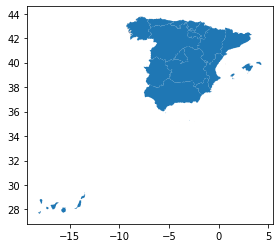

In [43]:
spain.plot()

In [4]:
spain.head()

,INSPIREID,COUNTRY,NATLEV,NATLEVNAME,NATCODE,NAMEUNIT,CODNUT1,CODNUT2,CODNUT3,geometry
0,ES.IGN.BDDAE.34200000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34200000000,Territorio no asociado a ninguna autonomía,0,0,None,"MULTIPOLYGON (((-4.29788 35.17045, -4.29786 35..."
1,ES.IGN.BDDAE.34190000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34190000000,Ciudad Autónoma de Melilla,ES6,ES64,None,"POLYGON ((-2.95264 35.32030, -2.95258 35.32015..."
2,ES.IGN.BDDAE.34180000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34180000000,Ciudad Autónoma de Ceuta,ES6,ES63,None,"POLYGON ((-5.38206 35.91240, -5.38192 35.91248..."
3,ES.IGN.BDDAE.34170000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34170000000,La Rioja,ES2,ES23,None,"POLYGON ((-2.75758 42.03262, -2.75738 42.03310..."
4,ES.IGN.BDDAE.34160000000,ES,https://inspire.ec.europa.eu/codelist/Administ...,Comunidad autónoma,34160000000,País Vasco/Euskadi,ES2,ES21,None,"MULTIPOLYGON (((-2.68167 43.42275, -2.68192 43..."


<AxesSubplot:>

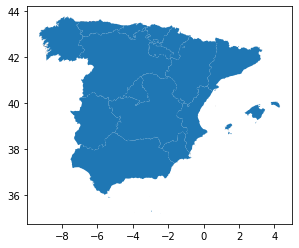

In [5]:
spain.plot()

In [102]:
import pandas as pd

telefonica = pd.read_csv("telefonica2020.csv", decimal=",")
telefonica["INV_HAB"] = telefonica.apply(lambda x: int(x["INVERSION"]/x["POBLACION"]*1000000), axis=1)
telefonica["TIEND_HAB"] = telefonica.apply(lambda x: int(x["POBLACION"]/x["TIENDAS"]), axis=1)
telefonica["ACCESOS_HAB"] = telefonica.apply(lambda x: str(round(x["ACCESOS"]/x["POBLACION"], 2)), axis=1)

In [103]:
ocean = gpd.read_file("/home/aarroyoc/NaturalEarth/ne_50m_ocean.shp")

In [104]:
tef = spain.merge(telefonica, on="NATCODE")

In [105]:
def plot(title, column):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_title(title, 
                 pad = 20, 
                 fontdict={'fontsize':20, 'color': '#4873ab'})
    ax.axis("off")
    ax.axis([-20, 5, 25, 45])
    fig.patch.set_facecolor('white')
    ax.set_facecolor("white")

    tef.plot(ax=ax, column=column, cmap="Greens")
    tef.apply(lambda x: ax.annotate(text=x[column], ha="center", xy=x.geometry.centroid.coords[0]), axis=1)
    ocean.plot(ax=ax, color="#89c0e8", zorder=0)
    ax.annotate('https://adrianistan.eu', xy = (1.0, -0.05),xycoords='axes fraction',ha='right',va="center",fontsize=10)
    fig.savefig(f"{column}.png", transparent=False)

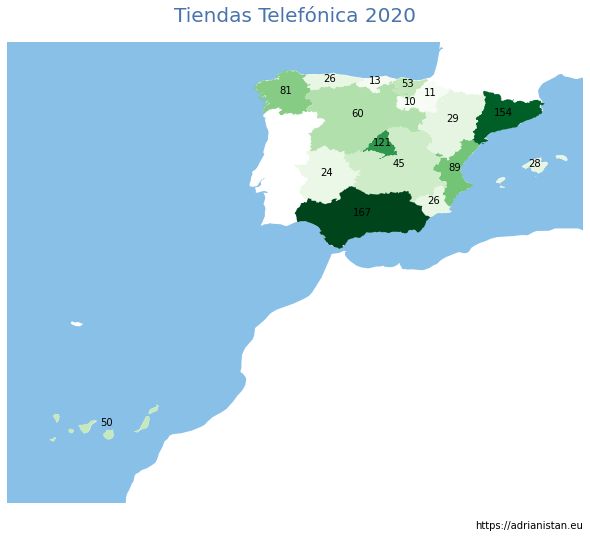

In [106]:
plot("Tiendas Telefónica 2020", "TIENDAS")

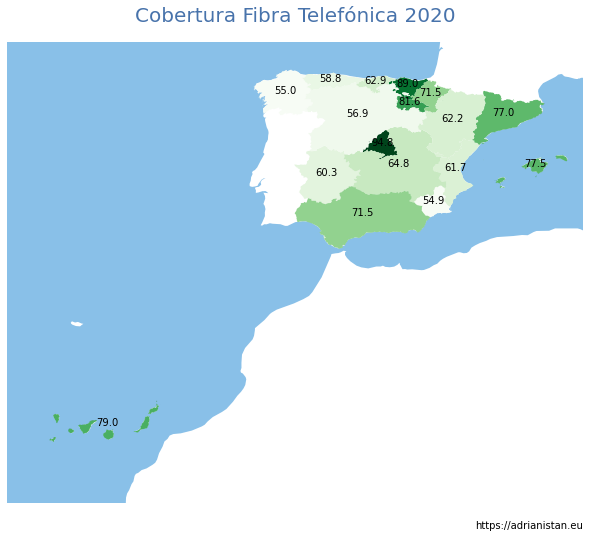

In [107]:
plot("Cobertura Fibra Telefónica 2020", "FIBRA")

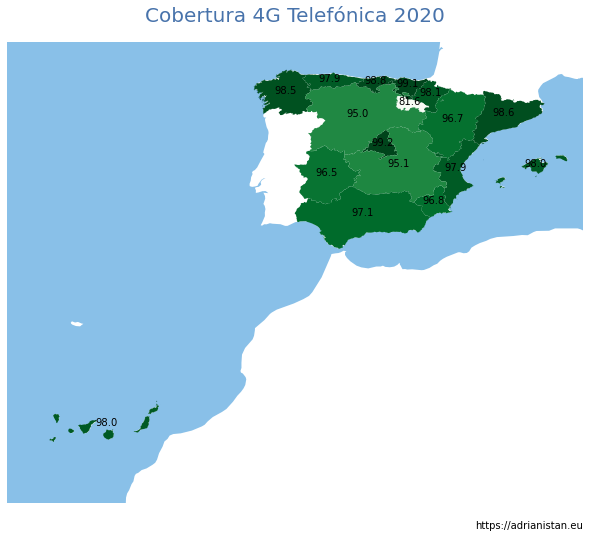

In [108]:
plot("Cobertura 4G Telefónica 2020", "4G")

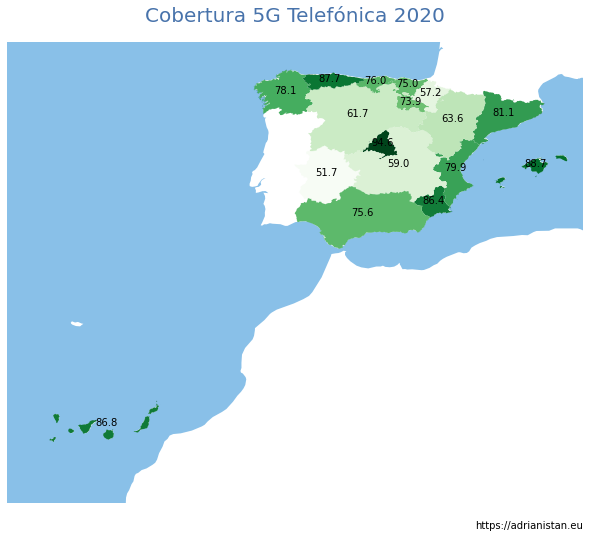

In [109]:
plot("Cobertura 5G Telefónica 2020", "5G")

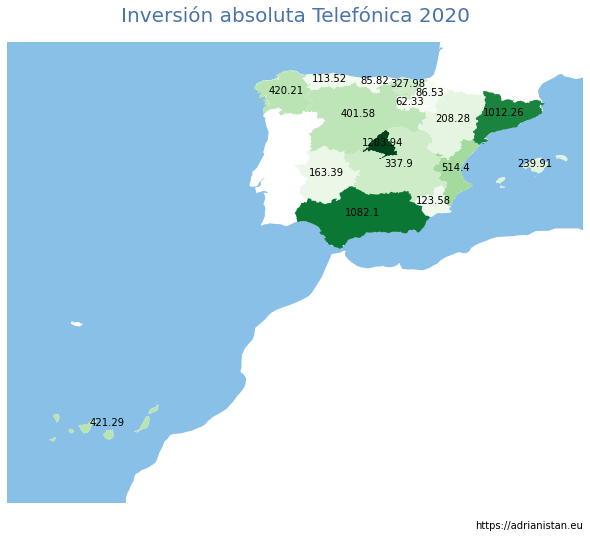

In [110]:
plot("Inversión absoluta Telefónica 2020", "INVERSION")

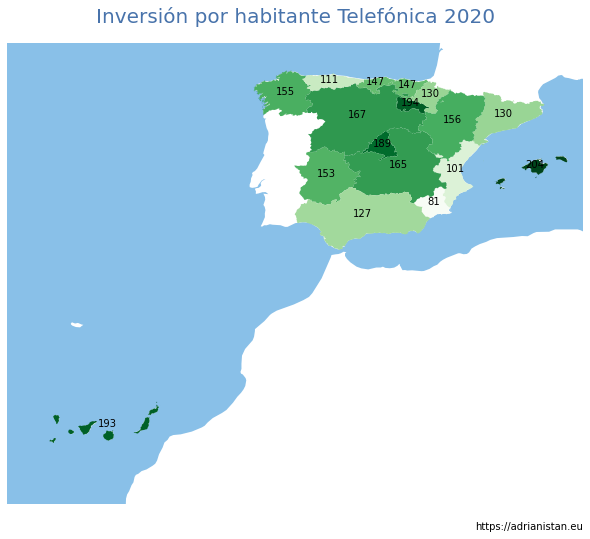

In [111]:
plot("Inversión por habitante Telefónica 2020", "INV_HAB")

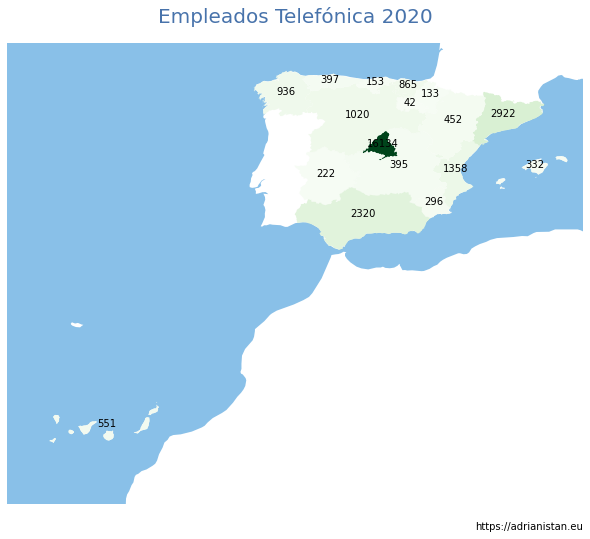

In [112]:
plot("Empleados Telefónica 2020", "EMPLEADOS")

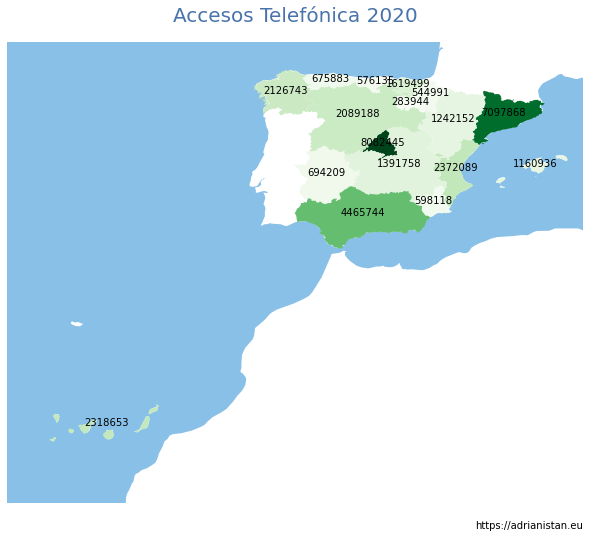

In [113]:
plot("Accesos Telefónica 2020", "ACCESOS")

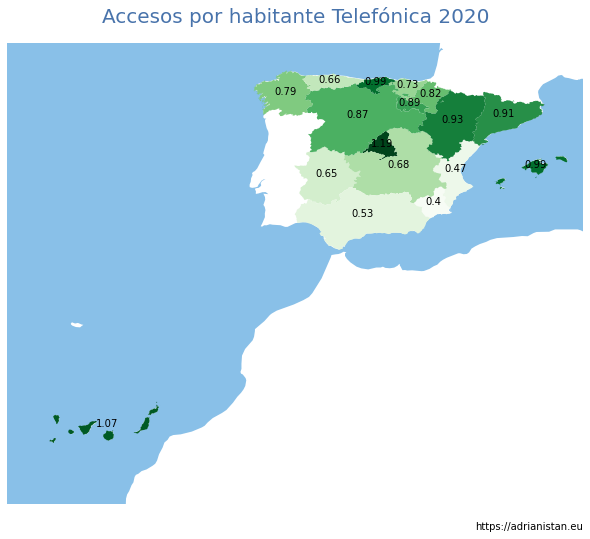

In [114]:
plot("Accesos por habitante Telefónica 2020", "ACCESOS_HAB")